Slike, regioni, binarizacija

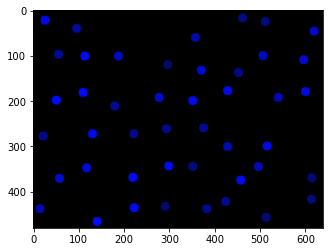

In [1]:
import matplotlib.pyplot as plt  # za prikaz slika, grafika, itd.
%matplotlib inline
# %matplotlib inline je komanda za prikaz slika i grafika unutar notebook-a (ne koristiti u običnim skriptama!!!)
import cv2

import numpy as np
# from skimage.io import imread
from scipy import ndimage

img = cv2.imread('images/img-0-45.png')  # img je Numpy array
plt.imshow(img)  # imshow je funkcija za prikaz slike (u formatu Numpy array-a)

Konverzija slike u nijanse sive

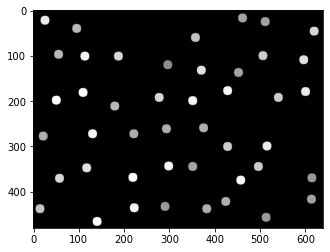

In [2]:
def my_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.21*img_rgb[:, :, 0] + 0.77*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray

img_gray = my_rgb2gray(img)
plt.imshow(img_gray, 'gray')

Binarizacija slike

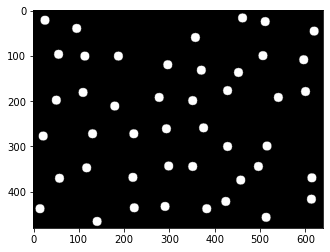

In [3]:
img_tr = img_gray > 0.5  # svi piskeli koji su veci od 0.5 ce dobiti vrednost True, tj. 1, i obrnuto
plt.imshow(img_tr, 'gray')

Regioni od interesa

45


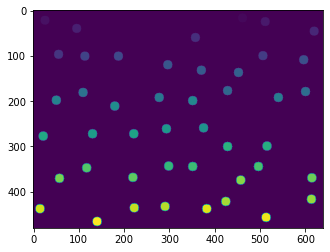

In [4]:
labeled, nr_objects = ndimage.label(img_tr)
print(nr_objects)
plt.imshow(labeled)

Malo komplikovanije

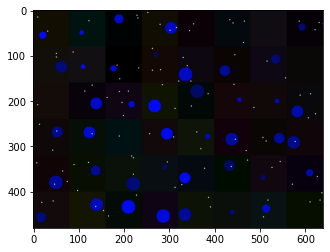

In [15]:
img = cv2.imread('images/img-0-41.png')  # img je Numpy array
plt.imshow(img) 

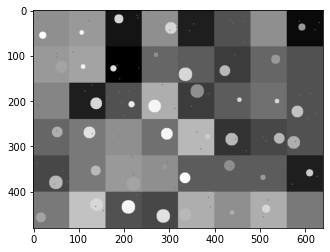

In [16]:
img_gray = my_rgb2gray(img)
plt.imshow(img_gray, 'gray')

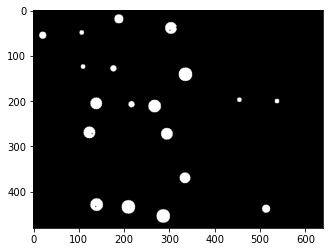

In [17]:
#print img_gray.max(axis=1)
img_tr = img_gray > 20 
plt.imshow(img_tr, 'gray')

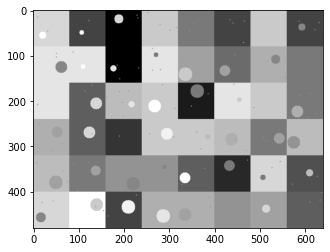

In [18]:
def my2_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.77*img_rgb[:, :, 0] + 0.21*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray
img = cv2.imread('images/img-0-41.png')
img_gray = my2_rgb2gray(img)
plt.imshow(img_gray, 'gray')

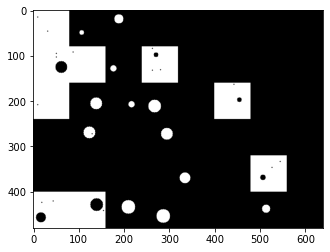

In [23]:
img_tr = img_gray > 15
plt.imshow(img_tr, 'gray')

In [24]:
labeled, nr_objects = ndimage.label(img_tr)
print(nr_objects)
obj = labeled==3
plt.imshow(obj)
vert = obj.max(axis=0)
v = labeled[:, vert]
obj2 = v ==3
hori = obj2.max(axis=1)

plt.imshow(v[hori,:])

17


Jos komplikovanije

In [25]:
img = cv2.imread('images/img-9-48.png')  # img je Numpy array
plt.imshow(img)  

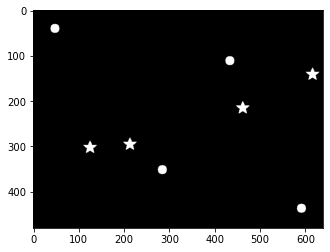

In [26]:
img_gray = my2_rgb2gray(img)
img_tr = img_gray > 60
plt.imshow(img_tr, 'gray')

8


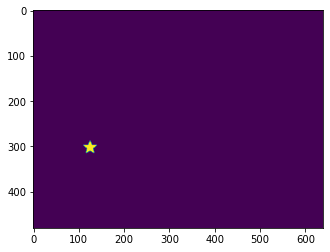

In [27]:
labeled, nr_objects = ndimage.label(img_tr)
print(nr_objects)
obj = labeled==6
plt.imshow(obj)

(27, 30)


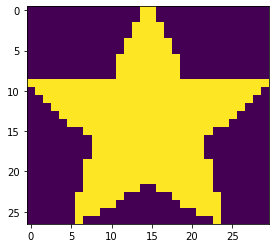

In [28]:
vert = obj.max(axis=0)
v = labeled[:, vert]
obj2 = v ==6
hori = obj2.max(axis=1)

roi = v[hori,:]
print(roi.shape)
plt.imshow(roi)